In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
amzn = pd.read_csv('AMZNPrices.csv')
amzn.Date = pd.to_datetime(amzn.Date)

#### The object `amzn.df` is a `data.frame` object, which are rectangular data objects with observations in rows and variables in columns. The `class()` function tells you the class of an R object:


In [ ]:
type(amzn)

pandas.core.frame.DataFrame

#### The `str()` function gives you information about the structure of the object:


In [ ]:
amzn.shape

(277, 2)

#### The `head()` function returns the first observations of the object:


In [ ]:
amzn.head()

,Date,Adj Close
0,2001-01-01,0.865625
1,2001-02-01,0.509375
2,2001-03-01,0.511500
3,2001-04-01,0.789000
4,2001-05-01,0.834500


#### The `tail()` function shows you the last observations:


In [ ]:
amzn.tail()

,Date,Adj Close
272,2023-09-01,127.120003
273,2023-10-01,133.089996
274,2023-11-01,146.089996
275,2023-12-01,151.940002
276,2024-01-01,149.100006


#### `colnames()` extract column names:


In [ ]:
amzn.columns.tolist()

['Date', 'Adj Close']

#### The "Date" column contains character values:


In [ ]:
amzn['Date'].dtype

dtype('<M8[ns]')

#### The "Adj.Close" column contains numeric values:


In [ ]:
amzn['Adj Close'].dtype

dtype('float64')

#### Notice how dates are not the end-of-month dates. This is Yahoo!'s default when you download monthly data. Yahoo! doesn't get the dates right for the monthly adjusted close data. Working with `data.frame` objects

Extract the first 5 rows of the price data.

In [ ]:
amzn['Adj Close'].values[:5]

array([0.865625, 0.509375, 0.5115  , 0.789   , 0.8345  ])

#### In the above operations, the dimension information was lost. To preserve the dimension information use `drop=FALSE`

In [ ]:
amzn['Adj Close'][:5]

0    0.865625
1    0.509375
2    0.511500
3    0.789000
4    0.834500
Name: Adj Close, dtype: float64

#### Find indices associated with the dates 1/1/2020 and 1/1/2021:


In [ ]:
index_1 = amzn.index[amzn['Date'] == '2020-01-01']
index_2 = amzn.index[amzn['Date'] == '2021-01-01']

print(amzn.loc[index_1])
print(amzn.loc[index_2])

          Date   Adj Close
228 2020-01-01  100.435997
          Date   Adj Close
240 2021-01-01  160.309998


#### Now, extract prices on 1/1/2020 and 1/1/2021 by sub-setting using the extracted indices:


In [ ]:
amzn[amzn.Date.isin(['2020-01-01', '2021-01-01'])]

,Date,Adj Close
228,2020-01-01,100.435997
240,2021-01-01,160.309998


#### Next, create a new `data.frame` containing the price data with the dates as the row names (using `drop = FALSE` prevents dropping the row and column dimensions)


In [ ]:
amzn.index = pd.to_datetime(amzn['Date'])
amzn = amzn['Adj Close']
amzn = pd.DataFrame(amzn)

In [ ]:
amzn

,Adj Close
Date,
2001-01-01,0.865625
2001-02-01,0.509375
2001-03-01,0.511500
2001-04-01,0.789000
2001-05-01,0.834500
...,...
2023-09-01,127.120003
2023-10-01,133.089996
2023-11-01,146.089996


#### With dates as rownames, you can subset directly on the dates. For example, find prices associated with the dates 1/1/2020 and 1/1/2021:


In [ ]:
amzn[amzn.index.isin(['2020-01-01', '2021-01-01'])].values

array([[100.435997],
       [160.309998]])

#### To show the rownames use `drop=FALSE`


In [ ]:
amzn[amzn.index.isin(['2020-01-01', '2021-01-01'])]

,Adj Close
Date,
2020-01-01,100.435997
2021-01-01,160.309998


#### The base R function 'plot()` can be used for simple plots. The default plot is a "points" (e.g. x-y) plot


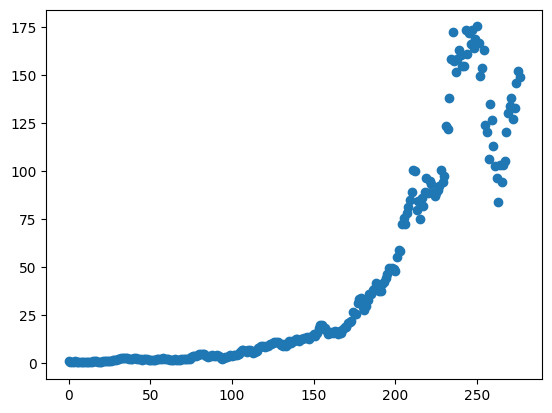

In [ ]:
plt.scatter(np.arange(amzn.shape[0]), amzn['Adj Close'].values)
plt.show()

#### Let's make a better plot. Set `type="l"` to specify a line plot, `col="blue"` to set the line color to blue, `lwd=2` to double the line thickness, `ylab="Adjusted close"` to add a y axis label, and `main="Monthly closing price of amzn"` to add a title. Also, use `legend()` to add a legend to the plot.


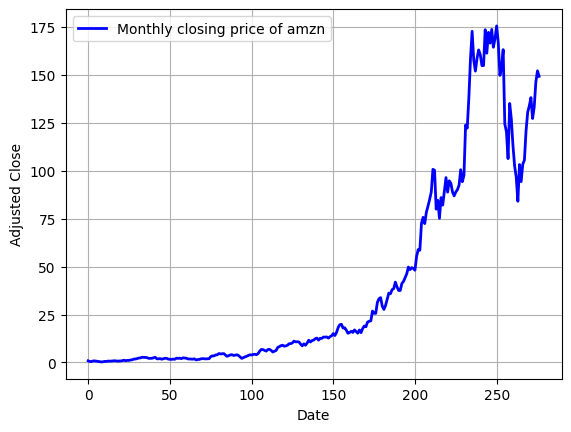

In [ ]:
plt.plot(amzn['Adj Close'].values, c="blue", linewidth=2, label='Monthly closing price of amzn')
plt.ylabel("Adjusted Close")
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

####  Notice there are no dates on the x-axis. We will see how to fix this later using data stored in specialized "time series" objects.

#### Computing returns

First, compute simple 1-month returns from prices (review how simple returns are computed and note how the calculation is implemented in the code below.)


In [ ]:
amzn['Simple Returns'] = amzn['Adj Close'].pct_change()
returns = amzn['Simple Returns']

#### Notice that the object `amzn.ret` is not a `data.frame`, but a numeric vector.


In [ ]:
type(returns)

pandas.core.series.Series

#### Now add dates as names to the vector. (Do you see why it starts from 2 to n?)


In [ ]:
returns_df = pd.DataFrame(returns)
returns_df.columns = ['ret']
returns_df.index = amzn.index


#### To ensure that `amzn.ret` is a `data.frame` use `drop=FALSE` when computing returns


In [ ]:
type(returns_df)

pandas.core.frame.DataFrame

#### Next, compute continuously compounded 1-month returns


In [ ]:
amzn['cts Returns'] = np.log(1 + returns)

#### Alternatively,
amzn.ccret = log(amznPrices.df[2:n,1]) - log(amznPrices.df[1:(n-1),1])
names(amzn.ccret) = rownames(amznPrices.df)[2:n]
head(amzn.ccret)

In [ ]:
# Call it CTS Returns to differentiate
amzn['CTS Returns'] = np.log(amzn['Adj Close']).diff()


#### Compare the simple and cc returns

In [ ]:
# Assuming amzn DataFrame has 'Simple Returns' and 'Continuously Compounded Returns' columns
returns_comparison = pd.concat([amzn['Simple Returns'], amzn['CTS Returns']], axis=1)
returns_comparison.columns = ['Simple Returns', 'CTS Returns']

# Display the head of the DataFrame
returns_comparison.head()

,Simple Returns,CTS Returns
Date,,
2001-01-01,NaN,NaN
2001-02-01,-0.411552,-0.530267
2001-03-01,0.004172,0.004163
2001-04-01,0.542522,0.433419
2001-05-01,0.057668,0.056066


#### Plot the simple and cc returns in separate graphs. Split screen into 2 rows and 1 column using the `par()` function:

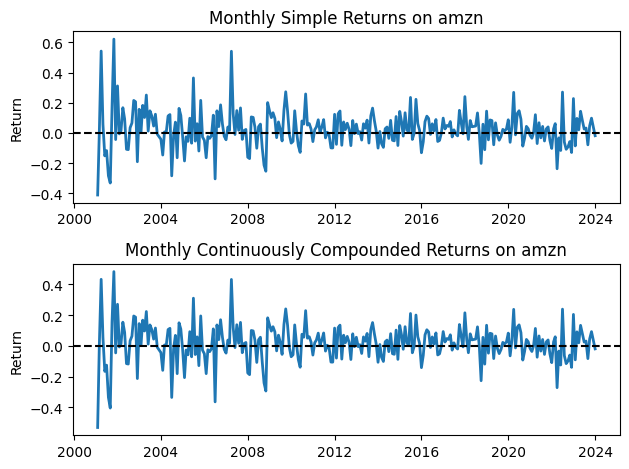

In [ ]:
# Set up a 2x1 subplot layout
plt.subplot(2, 1, 1)
plt.plot(amzn.index, amzn['Simple Returns'], linewidth=2)
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Return')
plt.title('Monthly Simple Returns on amzn')

# Move to the next subplot
plt.subplot(2, 1, 2)
plt.plot(amzn.index, amzn['CTS Returns'], linewidth=2)
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Return')
plt.title('Monthly Continuously Compounded Returns on amzn')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Next, plot the returns on the same graph

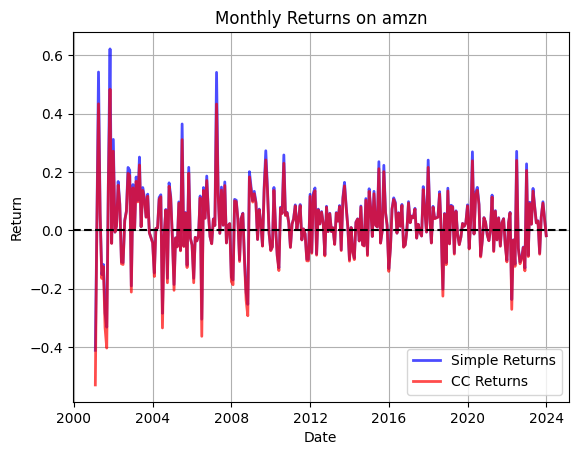

In [ ]:
# Plot both Simple Returns and Continuously Compounded Returns on the same graph
plt.plot(amzn.index, amzn['Simple Returns'], label='Simple Returns', color='blue', linewidth=2, alpha=0.7)
plt.plot(amzn.index, amzn['CTS Returns'], label='CC Returns', color='red', linewidth=2, alpha=0.7)

# Add a horizontal line at zero
plt.axhline(0, color='black', linestyle='--')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Monthly Returns on amzn')

plt.grid()
# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

#### Notice that the cc returns are different from the simple returns when the simple returns are either big positive or negative values.
#### Calculate growth of $1 invested in amzn. First, compute gross returns

In [ ]:
amzn['Gross Returns'] = 1 + amzn['Simple Returns']

#### Next, compute future values using the cumulative product of the gross returns (make sure you know which formula the code is implementing):


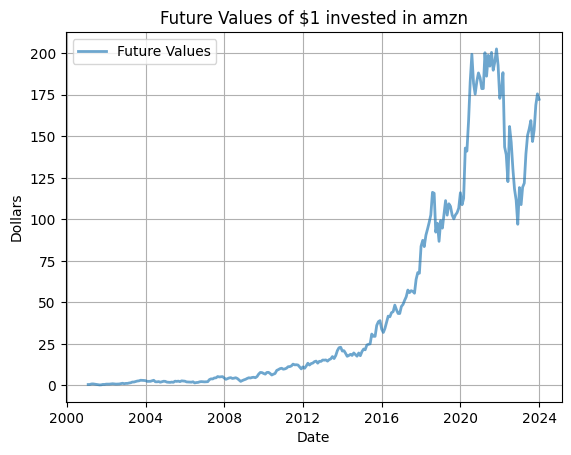

In [ ]:
amzn['Future Values'] = amzn['Gross Returns'].cumprod()

# Plot the future values
plt.plot(amzn.index, amzn['Future Values'], label='Future Values', linewidth=2, alpha=0.65)
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.title('Future Values of $1 invested in amzn')
plt.legend()
plt.grid()
plt.show()

#### Here we see that \$1 invested grows to about \$5 over the sample
#### Dynamic JavaScript web graphics

See the examples at https://rstudio.github.io/dygraphs/.

In R you can create interactive web graphics based on a number of JavaScript graphics libraries (e.g. D3, Hightcharts, dygraphs, etc). Here we will use the dygraphs JavaScript library through the R package **dygraphs**. You will also use the R packages **xts** and **zoo**. Make sure all of these packages are installed before running the code below.

First we need to create a specialized time series object called an "xts" object using the R package **xts**.


In Python we can keep using a pandas Data Frame

In [ ]:
amznPrices_x = pd.Series(amzn['Adj Close'].values, index=amzn.index)
amznRet_x = pd.Series(amzn['Simple Returns'].values, index=amzn.index)

# Display the head of the time series objects
print("amznPrices_x:")
print(amznPrices_x.head())

print("\namznRet_x:")
print(amznRet_x.head())

amznPrices_x:
Date
2001-01-01    0.865625
2001-02-01    0.509375
2001-03-01    0.511500
2001-04-01    0.789000
2001-05-01    0.834500
dtype: float64

amznRet_x:
Date
2001-01-01         NaN
2001-02-01   -0.411552
2001-03-01    0.004172
2001-04-01    0.542522
2001-05-01    0.057668
dtype: float64


#### The plot method for `xts` objects shows dates on the axes:
#### We can also create dynamic graph of prices - a graph will be displayed in Rstudio viewer pane that you can interact with
#### You can interact with the graph. Put your cursor on the graph and see how it iteracts.
Create dynamic graph for returns

## In python we use plotly the following way

In [ ]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

In [ ]:
fig = px.line(amzn, x=amzn.index, y='Adj Close', labels={'x': 'Date', 'y': 'Adj Close'},
              title='Interactive Plot of Adj Close Prices for amzn')
fig.show()

In [ ]:
pyo.plot(fig, include_plotlyjs=True, output_type='div')
html_code = pyo.plot(fig, include_plotlyjs=True, output_type='div', auto_open=False)
with open('plotly_graph.html', 'w') as file:
    file.write(html_code)